# 1. pandas-datareader
## stooq로 주가 지수 데이터 수집

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader.data as web
import seaborn as sns  

In [3]:
df = web.DataReader('^KOSPI', 'stooq')
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-08,2609.21,2612.39,2595.33,2607.20,517716000
2023-06-07,2623.46,2629.92,2615.60,2615.60,537617000
2023-06-05,2617.43,2618.62,2608.01,2615.41,545880000
2023-06-02,2586.27,2601.36,2583.88,2601.36,569620000
2023-06-01,2572.56,2580.15,2565.00,2569.17,675233000
...,...,...,...,...,...
2018-06-18,2404.68,2405.56,2365.81,2376.24,564818000
2018-06-15,2432.18,2433.51,2403.97,2404.04,502361000
2018-06-14,2450.86,2451.74,2422.37,2423.48,533448000


<Axes: xlabel='Date', ylabel='Close'>

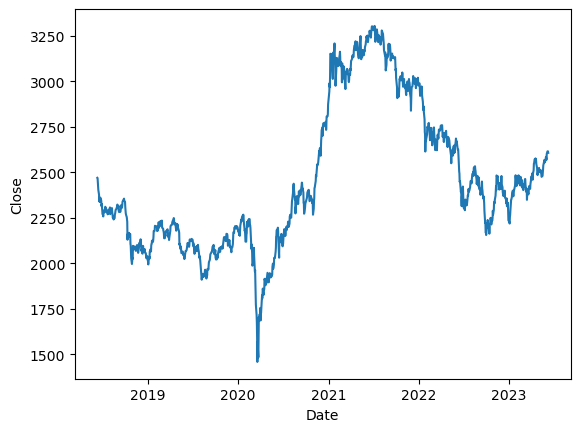

In [4]:
sns.lineplot(x=df.index, y="Close", data=df)

## FRED에서 원자재 가격 데이터 수집

In [5]:
import datetime

In [6]:
start = datetime.datetime(2018, 1,1) #start 지정안하면 4년치
#end도 지정가능

In [7]:
oil = web.DataReader('DCOILWTICO', 'fred', start)

In [8]:
oil

,DCOILWTICO
DATE,
2018-01-01,NaN
2018-01-02,60.37
2018-01-03,61.61
2018-01-04,61.98
2018-01-05,61.49
...,...
2023-05-30,69.45
2023-05-31,68.11
2023-06-01,70.09


In [9]:
oil.isnull().sum()

DCOILWTICO    57
dtype: int64

In [10]:
oil = oil.dropna()
oil

,DCOILWTICO
DATE,
2018-01-02,60.37
2018-01-03,61.61
2018-01-04,61.98
2018-01-05,61.49
2018-01-08,61.73
...,...
2023-05-30,69.45
2023-05-31,68.11
2023-06-01,70.09


## Alpha Vantage 에서 환율 데이터_api_key 필요

In [11]:
alphavantage_key = ' JW05102F08IASIY8'

### 일별 환율 데이터

In [12]:
df1 = web.DataReader("USD/KRW", "av-forex-daily", api_key = alphavantage_key)

In [13]:
df1

,open,high,low,close
2014-11-24,1110.94,1117.92,1110.41,1116.00
2014-11-25,1116.00,1116.00,1108.80,1110.85
2014-11-26,1110.85,1110.85,1102.62,1106.35
2014-11-27,1106.35,1106.35,1096.50,1101.00
2014-11-28,1102.10,1113.06,1101.00,1109.70
...,...,...,...,...
2023-06-05,1305.42,1310.73,1299.63,1299.63
2023-06-06,1299.80,1308.25,1295.65,1298.56
2023-06-07,1298.18,1308.62,1295.72,1307.53
2023-06-08,1308.33,1308.45,1294.92,1295.48


### 실시간 환율

In [14]:
df2 = web.DataReader("USD/KRW", "av-forex", api_key = alphavantage_key)
df2

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1290.22000000
Last Refreshed,2023-06-09 13:13:42
Time Zone,UTC
Bid Price,1290.16300000
Ask Price,1290.25000000


# 2. FinanceDataReader_국내 주식 데이터

In [15]:
!pip install finance-datareader

# * 미국 주식 개별종목 일자별 가격
# * 한국거래소 개별종목 일자별 가격
# * 각종 지수 데이터: 코스피, 코스닥, 다우, 나스닥, S&P 500
# * 환율 데이터: USD/KRX (원달러), USD/EUR, CNY/KRW
# * 암호화폐 가격: BTC/USD (Bitfinex), BTC/KRW (빗썸)
# * 한국 거래소 종목코드 리스팅: KRX (KOSPI, KODAQ, KONEX)
# * 미국 주식 종목코드 리스팅: NASDAQ, NYSE, AMEX, S&P 500 종목

In [16]:
import FinanceDataReader as fdr

In [17]:
samsung = fdr.DataReader('005930')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-25,1584,1667,1577,1644,428566,NaN
1999-02-26,1663,1696,1653,1687,444970,0.026156
1999-03-02,1704,1712,1657,1657,419963,-0.017783
1999-03-03,1663,1690,1635,1642,346979,-0.009053
1999-03-04,1641,1641,1610,1616,218289,-0.015834
...,...,...,...,...,...,...
2023-06-02,71700,72200,71600,72200,12161798,0.018336
2023-06-05,72700,72700,71400,71700,12686829,-0.006925
2023-06-07,71300,71600,70800,71000,14796613,-0.009763


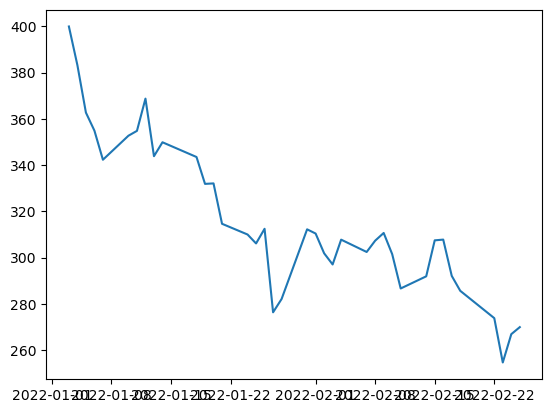

In [21]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# 테슬라(Tesla) 종목 코드: 'TSLA'
stock_code = 'TSLA'

# 2022년 1월 1일부터 2022년 2월 28일까지의 주식 데이터 가져오기
start_date = '2022-01-01'
end_date = '2022-02-28'
df = fdr.DataReader(stock_code, start_date, end_date)

# 주식 그래프 그리기
plt.plot(df['Close'])

In [18]:
usd_krw = fdr.DataReader('USD/KRW', '2013-01-01')

In [19]:
usd_krw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1062.500000,1064.500000,1061.640015,1062.500000,1062.500000,0.0
2013-01-02,1062.599976,1064.800049,1061.500000,1062.500000,1062.500000,0.0
2013-01-03,1062.400024,1063.800049,1059.199951,1062.599976,1062.599976,0.0
2013-01-04,1062.000000,1064.199951,1060.750000,1061.900024,1061.900024,0.0
2013-01-07,1055.000000,1063.900024,1033.000000,1033.099976,1033.099976,0.0
...,...,...,...,...,...,...
2023-06-05,1305.140015,1310.510010,1299.219971,1305.140015,1305.140015,0.0
2023-06-06,1299.790039,1303.329956,1294.819946,1299.790039,1299.790039,0.0
2023-06-07,1299.199951,1305.800049,1296.270020,1299.199951,1299.199951,0.0


<Axes: xlabel='Date'>

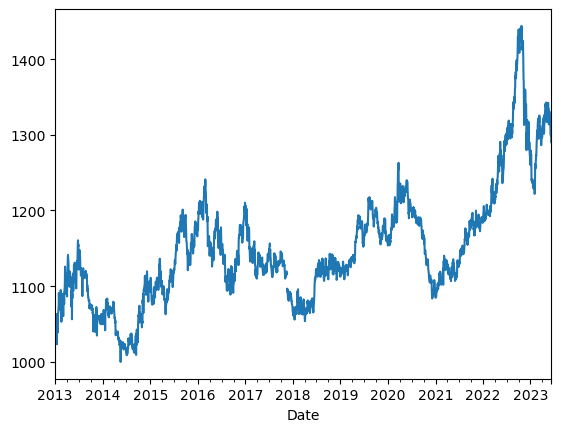

In [20]:
usd_krw['Close'].plot()